In [3]:
import numpy as np

In [6]:
# 행렬의 랭크 계산
X1 = np.array([[1, 3, 5], [2, 3, 7]])
np.linalg.matrix_rank(X1)

2

In [7]:
x = np.array([[1], [1]])

In [12]:
# 랭크-1 행렬 생성
rank1 = x @ x.T
rank1

array([[1, 1],
       [1, 1]])

In [14]:
# 랭크-1 행렬의 랭크 계산
np.linalg.matrix_rank(x)

1

In [16]:
import scipy as sp
import scipy.misc
import scipy.ndimage

f = sp.misc.face(gray=True)

In [17]:
f

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

(-0.5, 1023.5, 767.5, -0.5)

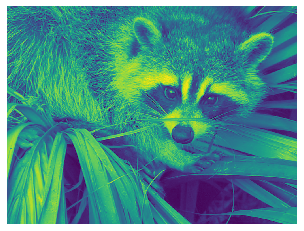

In [22]:
import matplotlib.pyplot as plt
plt.imshow(f) # matplotlib의 imshow, 너구리 그림
plt.axis("off")

In [26]:
e1 = np.array([0, 1]) # matplotlib의 이미지 좌표규약으로 부호 변경
e2 = np.array([1, 0])
E = np.vstack([e1, e2]).T # vstack은 위 아래로 쌓는다는 말, 그것을 트랜스포즈(전치)
g1 = np.array([1, 1]) / np.sqrt(2)
g2 = np.array([-1, 1]) / np.sqrt(2)
A = np.vstack([g1, g2]).T
gc1 = E @ g1
gc2 = E @ g2

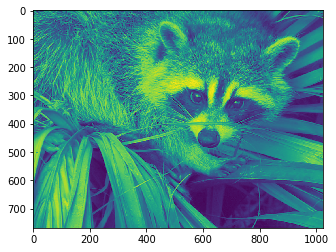

In [27]:
plt.imshow(f)

In [29]:
C = np.array([[0, -1], [1, 0]]) # 행렬 A
w3, v3 = np.linalg.eig(C) # 고윳값과 고유벡터 구하는 eig 함수 사용

print(w3)
print(v3)

[0.+1.j 0.-1.j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [30]:
import numpy as np

In [32]:
A = np.array([[2, 3], [2, 1]])
A

array([[2, 3],
       [2, 1]])

In [33]:
# 고윳값과 고유벡터 구하기
w, v = np.linalg.eig(A)
w, v

(array([ 4., -1.]),
 array([[ 0.83205029, -0.70710678],
        [ 0.5547002 ,  0.70710678]]))

In [35]:
# 고유벡터행렬의 역함수
v_inv = np.linalg.inv(v)
v_inv

array([[ 0.72111026,  0.72111026],
       [-0.56568542,  0.84852814]])

In [36]:
# 고윳값과 고유벡터로 A행렬 대각화(고유 분해)
result = v @ np.diag(w) @ v_inv # 여기서 np.diag()함수는 대각행렬 만들어주는 함수
result

array([[2., 3.],
       [2., 1.]])

In [37]:
# 특이분해
from numpy.linalg import svd

B = np.array([[3, 2, 2], [2, 3, -2]])
U, S, VT = svd(B)

In [40]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [39]:
S

array([5., 3.])

In [75]:
diag_S = np.diag(S, -1)[1:, :] # 0열벡터 만들어줄 땐 그냥 1, 0행벡터 만들어줄 땐 -1 
diag_S

array([[5., 0., 0.],
       [0., 3., 0.]])

In [66]:
VT

array([[-7.07106781e-01, -7.07106781e-01, -5.55111512e-17],
       [-2.35702260e-01,  2.35702260e-01, -9.42809042e-01],
       [-6.66666667e-01,  6.66666667e-01,  3.33333333e-01]])

In [67]:
V = VT.T
V

array([[-7.07106781e-01, -2.35702260e-01, -6.66666667e-01],
       [-7.07106781e-01,  2.35702260e-01,  6.66666667e-01],
       [-5.55111512e-17, -9.42809042e-01,  3.33333333e-01]])

In [79]:
print("B"); print(B)
print("\nU"); print(U)
print("\nS"); print(diag_S)
print("\nV"); print(VT.T)
print("\nU @ S @ VT "); print(U @ diag_S @ VT)

B
[[ 3  2  2]
 [ 2  3 -2]]

U
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

S
[[5. 0. 0.]
 [0. 3. 0.]]

V
[[-7.07106781e-01 -2.35702260e-01 -6.66666667e-01]
 [-7.07106781e-01  2.35702260e-01  6.66666667e-01]
 [-5.55111512e-17 -9.42809042e-01  3.33333333e-01]]

U @ S @ VT 
[[ 3.  2.  2.]
 [ 2.  3. -2.]]


In [80]:
# B행렬의 축소형
U2, S2, VT2 = svd(B, full_matrices=False)

In [81]:
U2

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [83]:
S2

array([5., 3.])

In [85]:
diag_S2 = np.diag(S2)
diag_S2

array([[5., 0.],
       [0., 3.]])

In [87]:
VT2

array([[-7.07106781e-01, -7.07106781e-01, -5.55111512e-17],
       [-2.35702260e-01,  2.35702260e-01, -9.42809042e-01]])

In [90]:
U2 @ diag_S2 @ VT2

array([[ 3.,  2.,  2.],
       [ 2.,  3., -2.]])